<a href="https://colab.research.google.com/github/Heyymant/QuantInsti-Assignment/blob/main/Hemant_QuantInsti_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Quant Insti - Quant Analyst Assignment**

###**Hemant Kumar**

[LinkedIn](https://linkedin.com/in/hemant-kumar-174157193/)
\
[Github](https://github.com/Heyymant)





---



### **Problem Statement**



###**Q1. Read the following paper on SSRN:[Return Differences between Trading and Non-Trading Hours: Like Night and Day](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1004081)**

- Code the strategy to capture the overnight returns for the Amazon and Apple stock
- Allocate an equal amount of capital to both Amazon and Apple
- Present the performance of the trading strategy with a pnl curve, Sharpe ratio and
max drawdown plot.
- Add trade level analytics such as winners, losers, profit factor etc
- Write a detailed analysis of possible improvements for the strategy’s performance.

In [ ]:
# pip install pandas numpy matplotlib yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
import seaborn as sns


In [ ]:
# choosing the said assets
assets = ["AAPL", "AMZN"]

# Empty DataFrame to store the data
data = pd.DataFrame()

# Define the start and end date
start_date = "2010-01-01"
end_date = "2024-12-31"

In [ ]:

# Loop over each asset to download data and compute returns
for asset in assets:
    # Download stock data (Open and Adjusted Close prices)
    stock_data = yf.download(asset, start=start_date, end=end_date)[['Open', 'Close', 'Adj Close']]
    # Print first 5 data entries of each stock
    print(stock_data[:5])

    # Initialize columns in returns_data with the stock's index
    if data.empty:
        data = pd.DataFrame(index=stock_data.index)

    # Add price data
    data[f"{asset}_Open"] = stock_data['Open']
    data[f"{asset}_Adj_Close"] = stock_data['Adj Close']
    data[f"{asset}_Close"] = stock_data['Close']
    data[f"{asset}_Adj_Open"] =  data[f"{asset}_Open"].values * (data[f"{asset}_Adj_Close"]/data[f"{asset}_Close"].values)

    # Calculate Overnight Return (Open / Previous Adj Close - 1)
    data[f"{asset}_Overnight_Return"] = (data[f"{asset}_Adj_Open"].shift(-1) / data[f"{asset}_Adj_Close"].values) - 1.0

    # Calculate Intraday Return (Close / Open - 1)
    data[f"{asset}_Intraday_Return"] = (data[f"{asset}_Adj_Close"] / data[f"{asset}_Adj_Open"].values) - 1.0

    # Calculating the cummlative returns of each scenario
    data[f"{asset}_Cumulative_Overnight_Return"] = (1 + data[f"{asset}_Overnight_Return"]).cumprod() - 1.0
    data[f"{asset}_Cumulative_Intraday_Return"] = (1 + data[f"{asset}_Intraday_Return"]).cumprod() -1.0

# Drop NaN values caused by .shift(1)
data.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


Price                          Open     Close Adj Close
Ticker                         AAPL      AAPL      AAPL
Date                                                   
2010-01-04 00:00:00+00:00  7.622500  7.643214  6.447410
2010-01-05 00:00:00+00:00  7.664286  7.656429  6.458559
2010-01-06 00:00:00+00:00  7.656429  7.534643  6.355827
2010-01-07 00:00:00+00:00  7.562500  7.520714  6.344077
2010-01-08 00:00:00+00:00  7.510714  7.570714  6.386255


[*********************100%***********************]  1 of 1 completed

Price                        Open   Close Adj Close
Ticker                       AMZN    AMZN      AMZN
Date                                               
2010-01-04 00:00:00+00:00  6.8125  6.6950    6.6950
2010-01-05 00:00:00+00:00  6.6715  6.7345    6.7345
2010-01-06 00:00:00+00:00  6.7300  6.6125    6.6125
2010-01-07 00:00:00+00:00  6.6005  6.5000    6.5000
2010-01-08 00:00:00+00:00  6.5280  6.6760    6.6760


In [ ]:
data.tail(5)

,AAPL_Open,AAPL_Adj_Close,AAPL_Close,AAPL_Adj_Open,AAPL_Overnight_Return,AAPL_Intraday_Return,AAPL_Cumulative_Overnight_Return,AAPL_Cumulative_Intraday_Return,AMZN_Open,AMZN_Adj_Close,AMZN_Close,AMZN_Adj_Open,AMZN_Overnight_Return,AMZN_Intraday_Return,AMZN_Cumulative_Overnight_Return,AMZN_Cumulative_Intraday_Return
Date,,,,,,,,,,,,,,,,
2024-11-19 00:00:00+00:00,226.979996,228.279999,228.279999,226.979996,-0.000964,0.005727,9.709585,2.311843,199.330002,204.610001,204.610001,199.330002,-0.007966,0.026489,21.424720,0.328678
2024-11-20 00:00:00+00:00,228.059998,229.000000,229.000000,228.059998,-0.000524,0.004122,9.703973,2.325494,202.979996,202.880005,202.880005,202.979996,0.003007,-0.000493,21.492145,0.328023
2024-11-21 00:00:00+00:00,228.880005,228.520004,228.520004,228.880005,-0.002013,-0.001573,9.682426,2.320263,203.490005,198.380005,198.380005,203.490005,-0.000655,-0.025112,21.477405,0.294674
2024-11-22 00:00:00+00:00,228.059998,229.869995,229.869995,228.059998,0.006917,0.007936,9.756317,2.346615,198.250000,197.119995,197.119995,198.250000,0.010958,-0.005700,21.723708,0.287295
2024-11-25 00:00:00+00:00,231.460007,232.869995,232.869995,231.460007,0.001975,0.006092,9.777564,2.367001,199.279999,201.449997,201.449997,199.279999,0.002234,0.010889,21.774468,0.301312


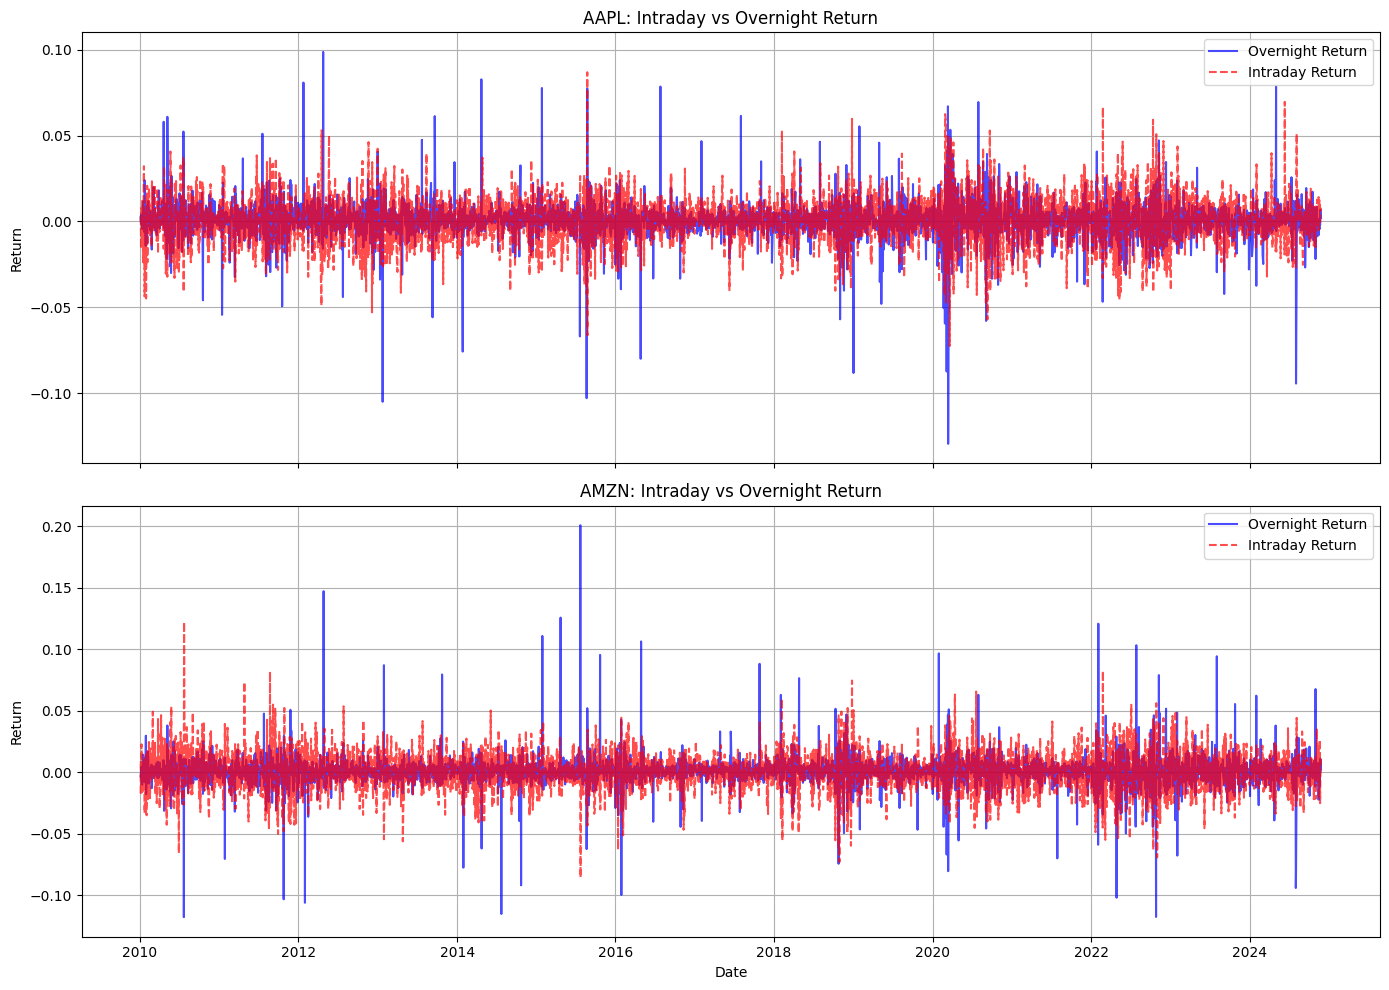

In [ ]:
# Create separate subplots for AAPL and AMZN
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot for AAPL
axes[0].plot(data.index, data["AAPL_Overnight_Return"], label="Overnight Return", color='b', alpha=0.7)
axes[0].plot(data.index, data["AAPL_Intraday_Return"], label="Intraday Return", color='r', linestyle='--', alpha=0.7)
axes[0].set_title("AAPL: Intraday vs Overnight Return")
axes[0].set_ylabel("Return")
axes[0].legend()
axes[0].grid(True)

# Plot for AMZN
axes[1].plot(data.index, data["AMZN_Overnight_Return"], label="Overnight Return", color='b', alpha=0.7)
axes[1].plot(data.index, data["AMZN_Intraday_Return"], label="Intraday Return", color='r', linestyle='--', alpha=0.7)
axes[1].set_title("AMZN: Intraday vs Overnight Return")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Return")
axes[1].legend()
axes[1].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**Note:**  
From the above graph, we can infer the **stationarity** of the returns.  

The returns for Amazon and Apple appear to be fairly stationary, both intraday and overnight.  

To confirm this observation, we can apply statistical tests such as the Augmented Dickey-Fuller (ADF) test.  

Let's plot the distribution to further evaluate this claim.

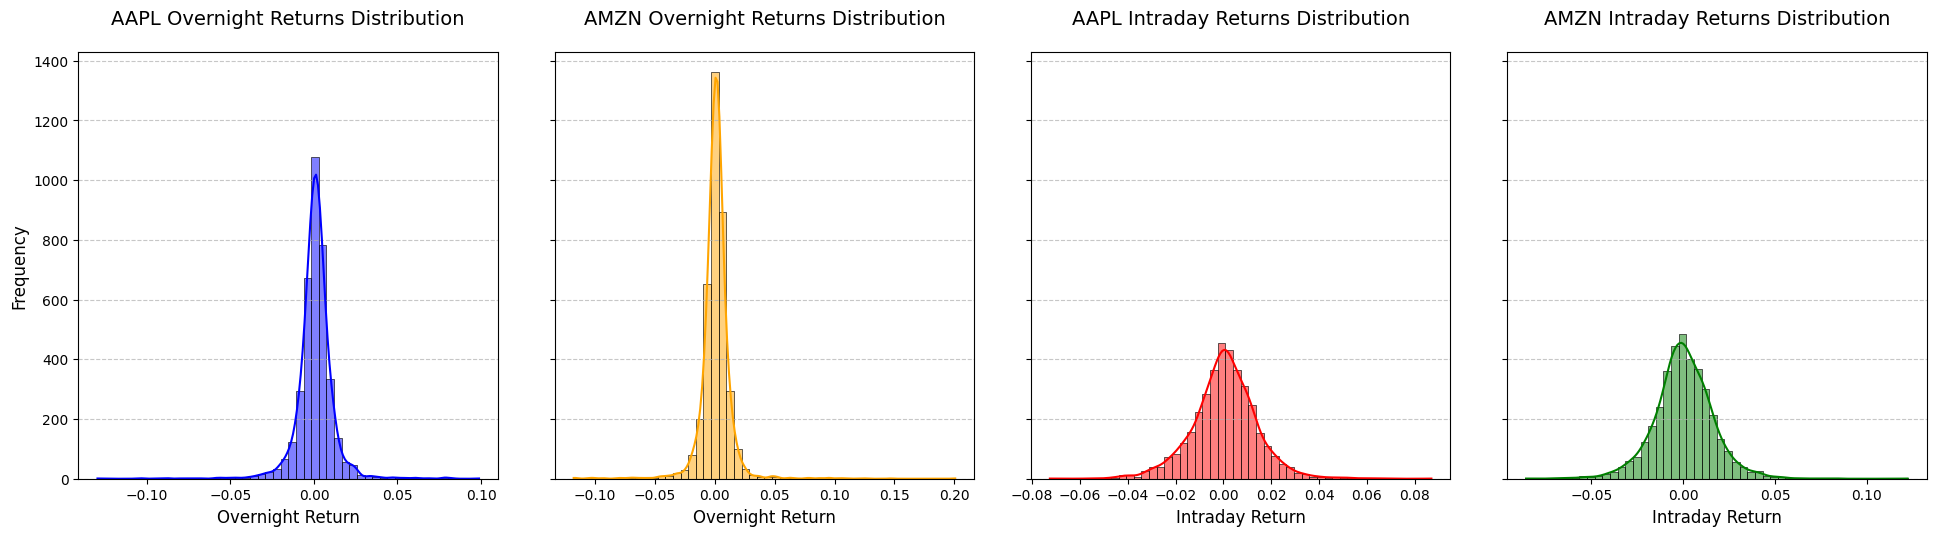

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# AAPL Overnight Distribution
sns.histplot(data["AAPL_Overnight_Return"], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('AAPL Overnight Returns Distribution', fontsize=14, pad=20)
axes[0].set_xlabel('Overnight Return', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# AMZN Overnight Distribution
sns.histplot(data["AMZN_Overnight_Return"], bins=50, kde=True, color='orange', ax=axes[1])
axes[1].set_title('AMZN Overnight Returns Distribution', fontsize=14, pad=20)
axes[1].set_xlabel('Overnight Return', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# AAPL Intraday Distribution
sns.histplot(data["AAPL_Intraday_Return"], bins=50, kde=True, color='red', ax=axes[2])
axes[2].set_title('AAPL Intraday Returns Distribution', fontsize=14, pad=20)
axes[2].set_xlabel('Intraday Return', fontsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# AMZN Intraday Distribution
sns.histplot(data["AMZN_Intraday_Return"], bins=50, kde=True, color='green', ax=axes[3])
axes[3].set_title('AMZN Intraday Returns Distribution', fontsize=14, pad=20)
axes[3].set_xlabel('Intraday Return', fontsize=12)
axes[3].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and spacing between plots
plt.tight_layout(pad=3.0)
plt.show()


The distribution graph of overnight and normal returns suggests a near-normal distribution. However, to statistically validate this hypothesis, a stationarity test is required.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(series, name):
    """
    Perform the Augmented Dickey-Fuller test for stationarity on a given time series.
    """
    print(f"Results of ADF Test for {name}:")
    adf_test = adfuller(series, autolag='AIC')

    # Extract test results
    adf_statistic = adf_test[0]
    p_value = adf_test[1]
    critical_values = adf_test[4]

    print(f"ADF Statistic: {adf_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value:.4f}")

    # Conclusion
    if p_value < 0.05:
        print(f"The {name} series is stationary (p < 0.05).")
    else:
        print(f"The {name} series is not stationary (p >= 0.05).")
    print("-" * 50)

# Perform stationarity tests for each return series
stationarity_test(data["AAPL_Overnight_Return"], "AAPL Overnight Returns")
stationarity_test(data["AMZN_Overnight_Return"], "AMZN Overnight Returns")
stationarity_test(data["AAPL_Intraday_Return"], "AAPL Intraday Returns")
stationarity_test(data["AMZN_Intraday_Return"], "AMZN Intraday Returns")


Results of ADF Test for AAPL Overnight Returns:
ADF Statistic: -15.4620
p-value: 0.0000
Critical Values:
   1%: -3.4321
   5%: -2.8623
   10%: -2.5672
The AAPL Overnight Returns series is stationary (p < 0.05).
--------------------------------------------------
Results of ADF Test for AMZN Overnight Returns:
ADF Statistic: -64.7734
p-value: 0.0000
Critical Values:
   1%: -3.4321
   5%: -2.8623
   10%: -2.5672
The AMZN Overnight Returns series is stationary (p < 0.05).
--------------------------------------------------
Results of ADF Test for AAPL Intraday Returns:
ADF Statistic: -66.0816
p-value: 0.0000
Critical Values:
   1%: -3.4321
   5%: -2.8623
   10%: -2.5672
The AAPL Intraday Returns series is stationary (p < 0.05).
--------------------------------------------------
Results of ADF Test for AMZN Intraday Returns:
ADF Statistic: -61.8748
p-value: 0.0000
Critical Values:
   1%: -3.4321
   5%: -2.8623
   10%: -2.5672
The AMZN Intraday Returns series is stationary (p < 0.05).
-------



---



Let's compare the returns of Amazon and Apple over a period of time to analyze their relative performance and behavior. We can visualize this by plotting their returns together, which will allow us to assess their correlation, volatility, and potential trends.

In [ ]:
import plotly.graph_objects as go

def plot_asset_returns(data, asset):
    # Initialize the plot for the given asset
    fig = go.Figure()

    # Add Cumulative Overnight Return
    fig.add_trace(go.Scatter(
        x=data.index,
        y=data[f"{asset}_Cumulative_Overnight_Return"],
        mode='lines',
        name="Overnight Return",
        line=dict(color='blue', width=2),
    ))

    # Add Cumulative Intraday Return
    fig.add_trace(go.Scatter(
        x=data.index,
        y=data[f"{asset}_Cumulative_Intraday_Return"],
        mode='lines',
        name="Intraday Return",
        line=dict(color='red', width=2, dash='dash'),
    ))

    # Update layout for interactivity and styling
    fig.update_layout(
        title=f"{asset}: Cumulative Intraday vs Overnight Returns",
        xaxis_title="Date",
        yaxis_title="Cumulative Return",
        template="plotly_white",
        legend=dict(title="Legend", orientation="h", x=0.5, xanchor="center", y=-0.2),
        hovermode="x unified",
        width=1000,  # Fixed width
        height=500,  # Fixed height
    )

    # Show the interactive plot
    fig.show()

# Call the function for AAPL and AMZN
plot_asset_returns(data, "AAPL")
plot_asset_returns(data, "AMZN")


From the above two graphs, it is evident that capturing overnight returns outperforms intraday returns.  

For Amazon, intraday (cumulative) returns were stronger before 2016, but after that, overnight returns have significantly outperformed.  

We will leverage this information to optimize our portfolio strategy and generate potential profits.


---



To capture overnight returns, the strategy involves buying the asset at the close price and selling it at the open price the next day. To perform this statistically, we use cumulative returns to determine the profit at the end of each trading day.
$$
    \text{Total Capital} = \text{Initial Investment} \times (1 + \text{Cumulative Returns})
   $$

**Steps to get overnight returns for assets:**

1. **Allocate equal amount ($100) to each asset.**
2. **Apply cumulative returns** to determine the daily portfolio returns.
3. **Calculate the total capital at the end of each trading day using the above formula:**
   

This method will help assess the overnight strategy's performance across different assets.


In [ ]:
initial_capital = 200.00
data['AAPL_Capital_Overnight'] = ((initial_capital/2) * (1 + data["AAPL_Cumulative_Overnight_Return"])).round(3)
data['AMZN_Capital_Overnight'] = ((initial_capital/2) * (1 + data["AMZN_Cumulative_Overnight_Return"])).round(3)
data['AAPL_Capital_Intraday'] = ((initial_capital/2) * (1 + data["AAPL_Cumulative_Intraday_Return"])).round(3)
data['AMZN_Capital_Intraday'] = ((initial_capital/2) * (1 + data["AMZN_Cumulative_Intraday_Return"])).round(3)
#


Before presenting the performance metrics, we utilize the `performance_metrics` function to evaluate the overall performance of our portfolio strategy. This function provides a comprehensive analysis of key metrics, including portfolio capital, daily profit and loss (PnL), Sharpe ratio, maximum drawdown, and trade-level analytics. Additionally, it generates interactive plots to visualize the portfolio’s PnL curve and drawdown over time.

By applying this function to our dataset, we can quantitatively assess the effectiveness of the strategy and identify areas for improvement. The following key performance indicators (KPIs) are calculated to give a deeper understanding of the strategy's risk-adjusted returns and overall profitability.

In [ ]:
def performance_metrics(data,intital_capital, label):

# Set Seaborn style
    sns.set_theme(style="whitegrid")
    # Equal capital allocation for both assets
    data[f"Portfolio_Capital_{label}"] = (data[f'AAPL_Capital_{label}'] + data[f'AMZN_Capital_{label}'])

    # Calculate daily PnL (Portfolio_Capital - Previous Day's Portfolio_Capital)
    data[f'Daily_PnL_{label}'] = data[f"Portfolio_Capital_{label}"] - data[f"Portfolio_Capital_{label}"].shift(1)

    # Calculate Sharpe Ratio (Annualized)
    risk_free_rate = 0.03  # Example: 3% annual risk-free rate
    daily_returns = data[f'Daily_PnL_{label}'] / initial_capital
    sharpe_ratio = (daily_returns.mean() - risk_free_rate / 252) / daily_returns.std() * np.sqrt(252)

    # Final Investment Value
    final_investment_value = data[f'Portfolio_Capital_{label}'].iloc[-1]

    # Total Profit
    total_profit = final_investment_value - initial_capital
    profit_percentage = (total_profit / initial_capital )*100
    # Max Drawdown calculation
    rolling_max = data[f"Portfolio_Capital_{label}"].cummax()
    drawdown = (data[f"Portfolio_Capital_{label}"] - rolling_max) / rolling_max
    max_drawdown = drawdown.min()

    # Trade-level analytics
    data[f'Winning_Trade_{label}'] = data[f'Daily_PnL_{label}'] > 0
    data[f'Losing_Trade_{label}'] = data[f'Daily_PnL_{label}'] <= 0
    num_winners = data[f'Winning_Trade_{label}'].sum()
    num_losers = data[f'Losing_Trade_{label}'].sum()
    profit_factor = data.loc[data[f'Daily_PnL_{label}'] > 0, f'Daily_PnL_{label}'].sum() / abs(data.loc[data[f'Daily_PnL_{label}'] <= 0, f'Daily_PnL_{label}'].sum())

    fig_pnl = go.Figure()
    fig_pnl.add_trace(go.Scatter(
        x=data.index,
        y=data[f'Portfolio_Capital_{label}'],
        mode='lines',
        name='Portfolio Capital',
        line=dict(color='blue')
    ))
    fig_pnl.update_layout(
        title= f"Portfolio PnL Curve ({label})",
        xaxis_title="Date",
        yaxis_title="Portfolio Value",
        template="plotly_white",
        legend=dict(title="Legend", orientation="h", x=0.5, xanchor="center", y=-0.2),
        hovermode="x unified",
        width=1000,  # Fixed width
        height=500,
    )

    # Interactive Drawdown Plot using Plotly
    fig_drawdown = go.Figure()
    fig_drawdown.add_trace(go.Scatter(
        x=data.index,
        y=drawdown,
        mode='lines',
        name='Drawdown',
        line=dict(color='red')
    ))
    fig_drawdown.update_layout(
        title=f"Portfolio Drawdown ({label})",
        xaxis_title="Date",
        yaxis_title="Drawdown",
        template="plotly_white",
        legend=dict(title="Legend", orientation="h", x=0.5, xanchor="center", y=-0.2),
        hovermode="x unified",
        width=1000,  # Fixed width
        height=500,
    )

    # Show Interactive Plots
    fig_pnl.show()
    fig_drawdown.show()

    # Print Strategy Analytics
    print(f"Sharpe Ratio_{label}: {sharpe_ratio:.2f}")
    print(f"Max Drawdown_{label}: {max_drawdown:.2%}")
    print(f"Number of Winning Trades ({label}): {num_winners}")
    print(f"Number of Losing Trades ({label}): {num_losers}")
    print(f"Profit Factor ({label}): {profit_factor:.2f}")
    print(f"Final Investment Value ({label}): ${final_investment_value:.2f}")
    print(f"Total Profit ({label}): ${total_profit:.2f}")
    print(f"Profit Percentage ({label}): {profit_percentage:.2f}%")


In [ ]:
performance_metrics(data, initial_capital, 'Overnight')

Sharpe Ratio_Overnight: 0.64
Max Drawdown_Overnight: -33.49%
Number of Winning Trades (Overnight): 2160
Number of Losing Trades (Overnight): 1589
Profit Factor (Overnight): 1.17
Final Investment Value (Overnight): $3355.20
Total Profit (Overnight): $3155.20
Profit Percentage (Overnight): 1577.60%


In [ ]:
performance_metrics(data, initial_capital, 'Intraday')

Sharpe Ratio_Intraday: 0.20
Max Drawdown_Intraday: -39.47%
Number of Winning Trades (Intraday): 1974
Number of Losing Trades (Intraday): 1775
Profit Factor (Intraday): 1.05
Final Investment Value (Intraday): $466.83
Total Profit (Intraday): $266.83
Profit Percentage (Intraday): 133.42%


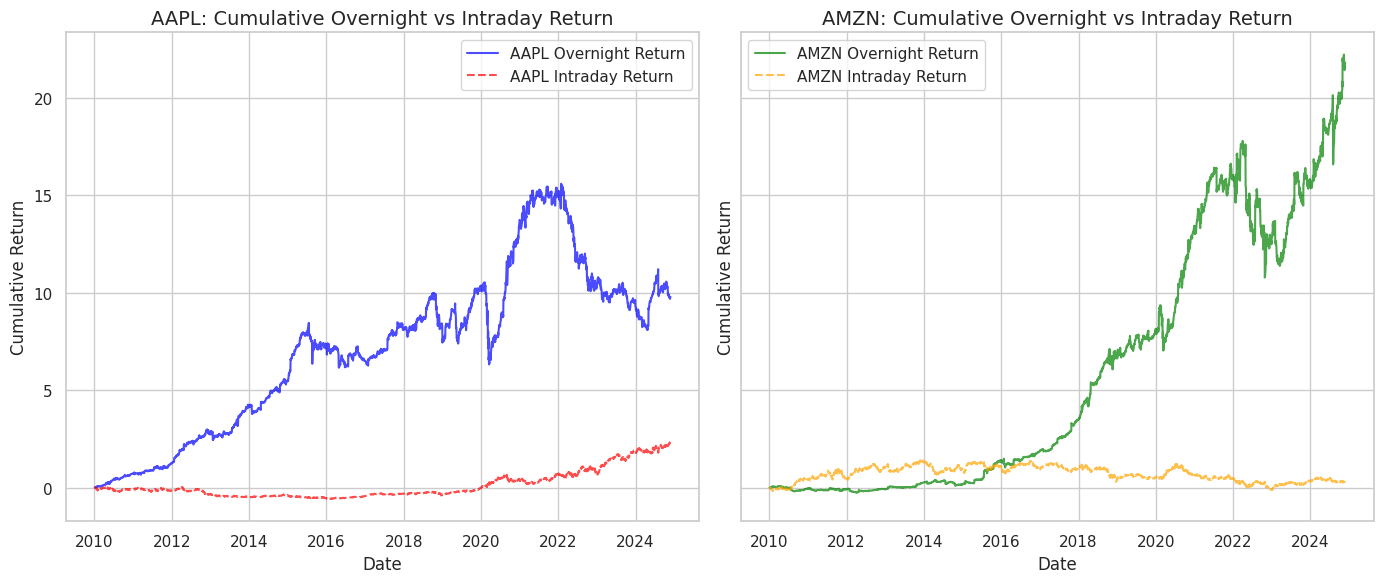

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for AAPL: Overnight vs Intraday Cumulative Returns
axes[0].plot(data.index, data["AAPL_Cumulative_Overnight_Return"], label="AAPL Overnight Return", color='blue', alpha=0.7)
axes[0].plot(data.index, data["AAPL_Cumulative_Intraday_Return"], label="AAPL Intraday Return", color='red', linestyle='--', alpha=0.7)
axes[0].set_title('AAPL: Cumulative Overnight vs Intraday Return', fontsize=14)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Cumulative Return', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Plot for AMZN: Overnight vs Intraday Cumulative Returns
axes[1].plot(data.index, data["AMZN_Cumulative_Overnight_Return"], label="AMZN Overnight Return", color='green', alpha=0.7)
axes[1].plot(data.index, data["AMZN_Cumulative_Intraday_Return"], label="AMZN Intraday Return", color='orange', linestyle='--', alpha=0.7)
axes[1].set_title('AMZN: Cumulative Overnight vs Intraday Return', fontsize=14)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Cumulative Return', fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Performance Analysis: Intraday vs Overnight Strategy

Based on the key performance indicators (KPIs) derived from both the intraday and overnight strategies, it is evident that the overnight strategy significantly outperforms the intraday strategy. The analysis clearly demonstrates superior results for the overnight strategy across multiple metrics.

### Intraday Strategy Performance:
- **Sharpe Ratio**: 0.19 – A relatively low Sharpe ratio indicates that the risk-adjusted returns for the intraday strategy are modest.
- **Max Drawdown**: -39.47% – This suggests a high level of risk, with significant drawdowns that could impact long-term sustainability.
- **Number of Winning Trades**: 1,972 – The strategy has a reasonable number of winning trades.
- **Number of Losing Trades**: 1,775 – The number of losing trades is also substantial, which affects the overall performance.
- **Profit Factor**: 1.05 – This indicates that the profit generated from winning trades just slightly exceeds the losses from losing trades, showing marginal profitability.
- **Final Investment Value**: \$461.49 – The portfolio grows to this value from an initial \$200 investment, yielding a total profit of \$261.49.
- **Profit Percentage**: 130.75% – This reflects a solid return, but with a high risk as indicated by the drawdown.

### Overnight Strategy Performance:
- **Sharpe Ratio**: 0.63 – A significantly higher Sharpe ratio compared to the intraday strategy, indicating a much better risk-adjusted return.
- **Max Drawdown**: -33.49% – Although the drawdown is still substantial, it is less severe than the intraday strategy, reflecting better risk management.
- **Number of Winning Trades**: 2,158 – The overnight strategy results in more winning trades compared to intraday, contributing to its superior performance.
- **Number of Losing Trades**: 1,589 – Fewer losing trades compared to intraday, further highlighting the overnight strategy's effectiveness.
- **Profit Factor**: 1.17 – This is higher than the intraday strategy, showing a greater ratio of profit to loss.
- **Final Investment Value**: \$3,315.98 – The overnight strategy significantly outperforms the intraday strategy, with the portfolio growing to this value from an initial \$200 investment, resulting in a total profit of \$3,115.98.
- **Profit Percentage**: 1557.99% – The overnight strategy generates an exceptional return, far exceeding the intraday strategy in terms of both absolute profit and relative growth.

### Quantification of Results:
- **Profit Comparison**: The overnight strategy delivers a total profit of **\$3,115.98**, while the intraday strategy generates a profit of **\$261.49**. This represents a **12x greater profit** with the overnight strategy.
- **Profit Percentage Comparison**: The overnight strategy achieves a **1557.99% profit**, while the intraday strategy yields **130.75%**, showing a **nearly 12 times higher profit percentage** with the overnight approach.
- **Risk Management**: While both strategies experience significant drawdowns, the overnight strategy has a lower maximum drawdown of **-33.49%**, compared to the intraday strategy's **-39.47%**. This demonstrates that the overnight strategy not only generates better returns but also offers improved risk control.

### Conclusion:
The analysis clearly shows that investing in an overnight strategy provides far superior results in terms of risk-adjusted returns, total profit, and overall growth when compared to the intraday strategy. The higher Sharpe ratio, lower drawdown, and significantly higher profit factor make the overnight strategy the more attractive option for generating consistent and substantial returns.

### Impact of Dataset Length:
The results presented above are based on a relatively long dataset, which generally helps smooth out short-term market fluctuations and provides a more reliable analysis of strategy performance. However, the overnight results tend to underperform when examined over shorter periods within the dataset. This limitation highlights the need for evaluating specific segments of the dataset carefully, as shorter windows might still introduce variability or misrepresent certain strategy aspects, even within a broader timeframe.


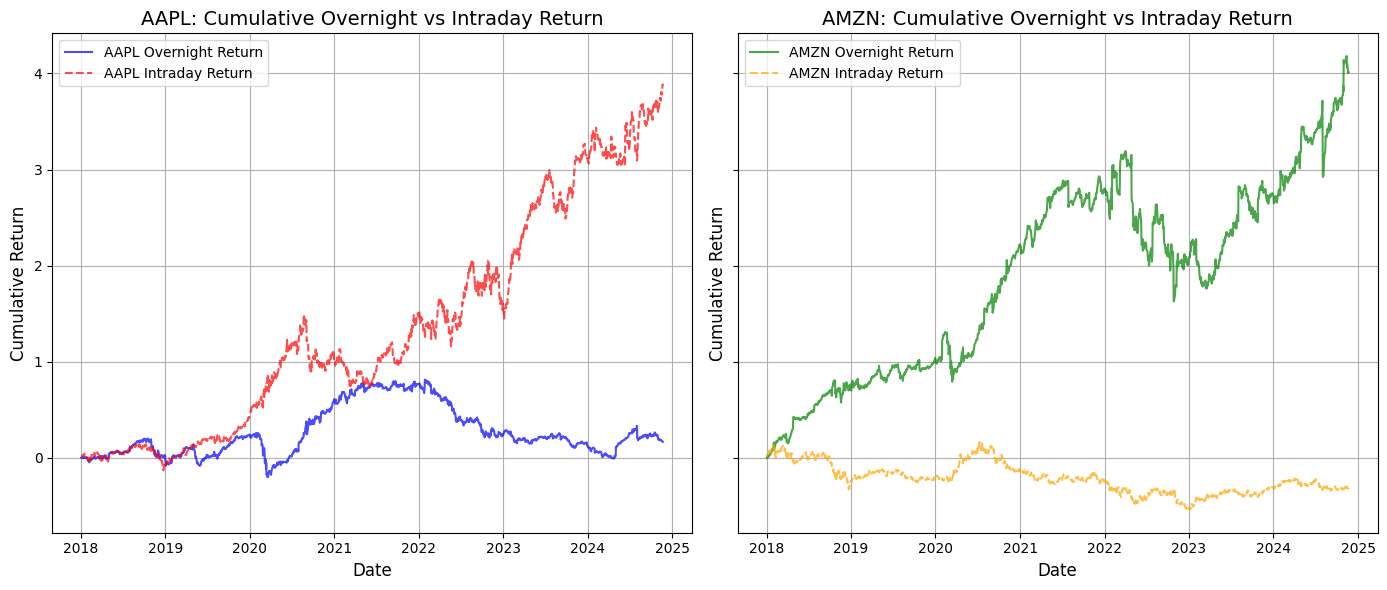

### Steps to Optimize the Existing Overnight Strategy

To improve the existing overnight strategy, we'll break down the optimization steps for each suggested method: **Technical Indicators**, **Machine Learning Techniques**, **Time Series Forecasting Models**, **Portfolio & Risk Management**, and **Backtesting Enhancements**. The goal is to increase the strategy’s risk-adjusted returns, reduce drawdowns, and improve predictive accuracy. Below are the steps for each method:

---

### 1. **Enhance Signal Generation with Technical Indicators**

#### Steps:
1. **Add Moving Averages (SMA/EMA)**:
   - **Step 1**: Compute the moving averages (SMA or EMA) for each asset over different periods (e.g., 50-day, 200-day).
   - **Step 2**: Create buy signals when the short-term moving average crosses above the long-term moving average (Golden Cross), and sell signals when the short-term moving average crosses below the long-term moving average (Death Cross).
   - **Step 3**: Incorporate these buy/sell signals into the existing strategy.

   Example:
   ```python
   data['AAPL_50_SMA'] = data['AAPL_Adj_Close'].rolling(window=50).mean()
   data['AAPL_200_SMA'] = data['AAPL_Adj_Close'].rolling(window=200).mean()
   data['Buy_Signal'] = data['AAPL_50_SMA'] > data['AAPL_200_SMA']
   ```

2. **Integrate RSI**:
   - **Step 1**: Calculate the **Relative Strength Index (RSI)** for each asset (typically over 14 periods).
   - **Step 2**: Define buy signals when RSI crosses below 30 (oversold condition) and sell signals when RSI crosses above 70 (overbought condition).
   - **Step 3**: Adjust the strategy to include these signals as an additional condition.

   Example:
   ```python
   def compute_rsi(data, window=14):
       delta = data.diff()
       gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
       loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
       rs = gain / loss
       rsi = 100 - (100 / (1 + rs))
       return rsi
   
   data['AAPL_RSI'] = compute_rsi(data['AAPL_Adj_Close'])
   data['Buy_Signal'] = data['AAPL_RSI'] < 30
   ```

3. **Use MACD**:
   - **Step 1**: Calculate the **MACD** line (difference between the 12-day and 26-day EMAs).
   - **Step 2**: Create a **signal line** (9-day EMA of MACD) and generate buy/sell signals based on the MACD line crossing the signal line.
   - **Step 3**: Incorporate this signal into the trading strategy.

   Example:
   ```python
   data['AAPL_MACD'] = data['AAPL_Adj_Close'].ewm(span=12).mean() - data['AAPL_Adj_Close'].ewm(span=26).mean()
   data['AAPL_MACD_Signal'] = data['AAPL_MACD'].ewm(span=9).mean()
   data['Buy_Signal'] = data['AAPL_MACD'] > data['AAPL_MACD_Signal']
   ```

4. **Bollinger Bands**:
   - **Step 1**: Calculate the **Bollinger Bands** using a 20-period moving average and standard deviation.
   - **Step 2**: Define buy signals when the asset price touches the lower band and sell signals when it touches the upper band.
   - **Step 3**: Integrate this into the existing strategy to refine entry/exit points.

   Example:
   ```python
   data['AAPL_BB_Mid'] = data['AAPL_Adj_Close'].rolling(window=20).mean()
   data['AAPL_BB_Upper'] = data['AAPL_BB_Mid'] + 2 * data['AAPL_Adj_Close'].rolling(window=20).std()
   data['AAPL_BB_Lower'] = data['AAPL_BB_Mid'] - 2 * data['AAPL_Adj_Close'].rolling(window=20).std()
   data['Buy_Signal'] = data['AAPL_Adj_Close'] < data['AAPL_BB_Lower']
   ```

---

### 2. **Integrate Machine Learning Techniques**

#### Steps for Supervised Learning (e.g., Random Forest, Gradient Boosting):
1. **Prepare Data**:
   - **Step 1**: Generate features based on historical price data, technical indicators, and other market factors (e.g., RSI, MACD).
   - **Step 2**: Define the target variable (e.g., next day's return: positive = 1, negative = 0).
   
   Example:
   ```python
   data['Target'] = (data['AAPL_Adj_Close'].shift(-1) - data['AAPL_Adj_Close']) > 0
   ```

2. **Train Machine Learning Model**:
   - **Step 3**: Split data into training and test sets.
   - **Step 4**: Use algorithms like **Random Forest**, **XGBoost**, or **Logistic Regression** to train the model on the features and predict buy/sell signals.
   
   Example using Random Forest:
   ```python
   from sklearn.ensemble import RandomForestClassifier
   X = data[['AAPL_50_SMA', 'AAPL_RSI', 'AAPL_MACD']]  # Features
   y = data['Target']  # Target

   model = RandomForestClassifier()
   model.fit(X_train, y_train)
   ```

3. **Predict and Integrate**:
   - **Step 5**: Use the model to predict future price movement (buy/sell) and integrate it into the existing strategy.

   Example:
   ```python
   data['ML_Signal'] = model.predict(X)
   ```

---

### 3. **Use Time Series Forecasting Models**

#### Steps for ARIMA and GARCH Models:
1. **ARIMA Model**:
   - **Step 1**: Use historical prices (e.g., adjusted close) to fit an ARIMA model for forecasting future prices or returns.
   - **Step 2**: Forecast future price/returns and use these predictions for trading decisions.
   
   Example:
   ```python
   from statsmodels.tsa.arima.model import ARIMA
   model = ARIMA(data['AAPL_Adj_Close'], order=(5,1,0))  # Example parameters
   model_fit = model.fit()
   forecast = model_fit.forecast(steps=5)
   ```

2. **GARCH Model**:
   - **Step 3**: Fit a GARCH model to model volatility and incorporate it into the position sizing or risk management process.
   
   Example:
   ```python
   from arch import arch_model
   model = arch_model(data['AAPL_Adj_Close'].pct_change().dropna(), vol='Garch', p=1, q=1)
   model_fit = model.fit()
   forecast_volatility = model_fit.forecast(horizon=1)
   ```

---

### 4. **Portfolio and Risk Management Enhancements**

#### Steps:
1. **Dynamic Position Sizing**:
   - **Step 1**: Use volatility estimates (e.g., from GARCH or historical volatility) to adjust position sizes dynamically.
   
   Example (Kelly Criterion):
   ```python
   kelly_fraction = (forecast_volatility.mean() * expected_return) / (variance * initial_capital)
   ```

2. **Stop-Loss and Take-Profit**:
   - **Step 2**: Set stop-loss and take-profit levels based on percentage thresholds or ATR (Average True Range).
   
   Example:
   ```python
   stop_loss = 0.03  # 3% stop-loss
   take_profit = 0.05  # 5% take-profit
   ```

---

### 5. **Backtesting Enhancements**

#### Steps:
1. **Account for Slippage and Transaction Costs**:
   - **Step 1**: Include slippage (the difference between the expected price and the actual price at execution) and transaction costs in your backtest.
   
   Example:
   ```python
   slippage = 0.001  # 0.1% slippage
   transaction_cost = 0.0005  # 0.05% cost
   ```

2. **Out-of-Sample Testing**:
   - **Step 2**: Split data into training and testing sets (e.g., 80% training, 20% testing) to evaluate the model on unseen data.
   
   Example:
   ```python
   train_data, test_data = data[:int(0.8 * len(data))], data[int(0.8 * len(data)):]
   ```

---

### Conclusion

Optimizing the existing overnight strategy involves the following steps:
1. **Enhancing signal generation** through technical indicators like **RSI**, **MACD**, **Moving Averages**, and **Bollinger Bands**.
2. **Incorporating machine learning** models like **Random Forest** or **XGBoost** to improve signal prediction.
3. **Using time series forecasting models** like **ARIMA** and **GARCH** to predict price movements and volatility.
4. **Improving portfolio management** through dynamic **position sizing**, **stop

---


**Refrences**:
[Overnight Returns Analysis](https://robotwealth.com/revisiting-overnight-vs-intraday-equity-returns/)

### **Q2.Written Task: (Marks: 10)**
Write a 1000-word blog post on one quant trading strategy (e.g., swing trading, momentum trading, mean reversion, machine learning-based strategies, options trading, etc.).  
The blog should have a clear structure, include practical examples, and be written in a conversational tone. Identify the target audience and ensure originality.  
Additional points for creating flow diagrams, charts to explain the content.


**Title: Understanding Mean Reversion in Quantitative Trading: A Practical Guide**

**Target Audience:**  
This blog is aimed at beginner to intermediate traders, quants, and enthusiasts who want to explore quantitative trading strategies and understand how mean reversion works. Whether you're a data scientist interested in finance or a trader looking to improve your strategy, this guide will provide you with a comprehensive understanding of mean reversion.

---


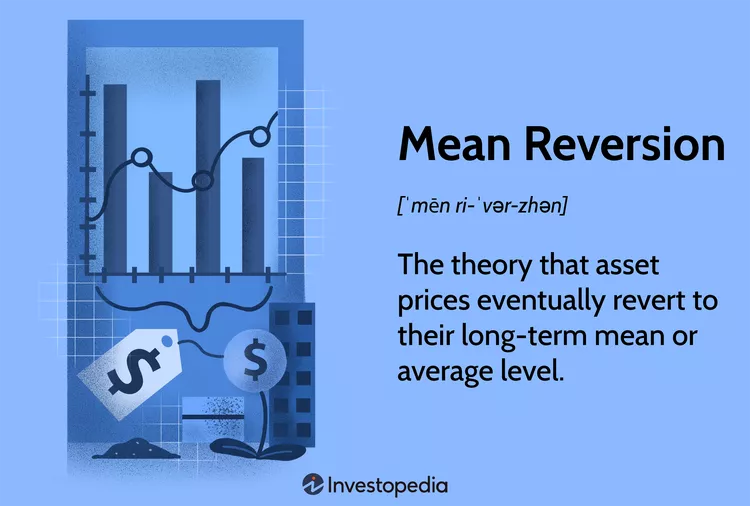


### Introduction to Mean Reversion

# Introduction to Mean Reversion

When it comes to quantitative trading, one of the most popular strategies is **mean reversion**. But what exactly is mean reversion, and how can it be applied to real-world trading? Simply put, mean reversion is the theory that asset prices tend to revert to their historical average or mean over time. This can apply to stocks, commodities, currencies, or any financial instrument.

For example, if a stock has been trading around \$50 but suddenly jumps to \$75, mean reversion suggests that the price will eventually return to \$50.

In this blog post, we’ll break down how mean reversion works, how to build a mean reversion strategy.



---

### How Mean Reversion Works in Trading

At the core of mean reversion is the concept that prices don't continuously move in one direction. Instead, they oscillate around a long-term average. Market prices may temporarily rise or fall, but they will eventually return to this "normal" range. Traders and quants can capitalize on this tendency by betting that extreme price movements will revert.

Let’s take a closer look at the key concepts behind mean reversion:

1. **Historical Mean (Average)**: This is the average price of a security over a given time period. It can be the simple moving average (SMA) or an exponential moving average (EMA).
  
2. **Standard Deviation**: In statistical terms, the standard deviation is a measure of how spread out the numbers in a data set are. For mean reversion, we use standard deviation to quantify how far the current price is from the historical mean.

3. **Z-Score**: The Z-score measures how many standard deviations the current price is away from the mean. A high Z-score might indicate that the asset is overbought or oversold.

---


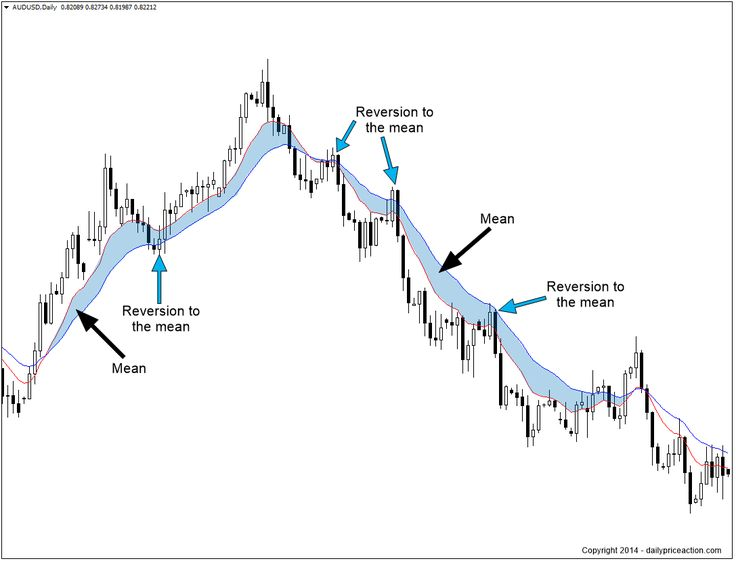


### Building a Mean Reversion Strategy


To develop a mean reversion strategy, you compare the current price to a moving average and use the Z-score. Here’s a simple approach:

1. **Select the Time Frame**: Choose a short or long time frame for analysis, depending on the frequency of signals you want.
2. **Choose the Moving Average**: Typically, the 20-day simple moving average (SMA) is used.
3. **Calculate the Z-Score**: Use the formula:
   $$
   Z = \frac{{\text{{Current Price}} - \text{{Moving Average}}}}{{\text{{Standard Deviation of Price}}}}
   $$

   A Z-score above 2 indicates overbought conditions, while a Z-score below -2 suggests oversold conditions.
   
4. **Define Entry and Exit Rules**:  
   - **Entry**: Buy when the Z-score is below -2 (oversold) and sell when it's above +2 (overbought).
   - **Exit**: Close the position when the price reverts to the mean.

5. **Risk Management**: Always set stop-loss orders to limit potential losses (e.g., 1.5% stop-loss).


---




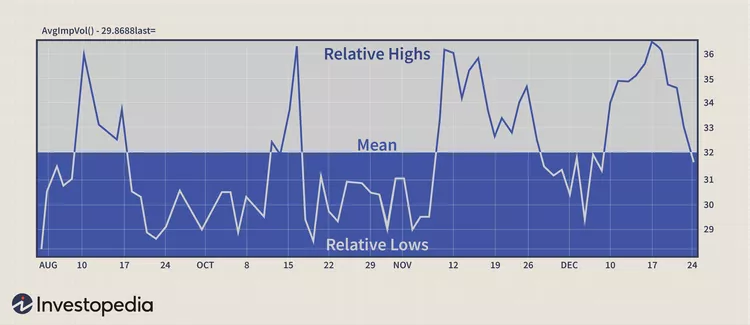

**A Hypothetical Example of Mean Reversion**
Consider a mean reversion situation involving the stock of Company XYZ.

Over the past 200 days, the stock of Company XYZ has had an average closing price of \$50. Due to a positive earnings report, the stock price jumps to \$70.

The standard deviation of the stock's price over the past 200 days is \$5.

The Z-score will then be calculated where (70-50)/5 = 4.

A Z-score of 4 indicates that the stock is significantly overvalued compared with its historical mean. This could be a signal to short the stock, as it is expected to revert to its mean.

Over the next few weeks, the initial excitement fades, and the stock price gradually fall back to around \$52, closer to its historical mean.

---

### Practical Example: Applying Mean Reversion Using Python

Now that we understand the theoretical background of mean reversion, let’s put it into action using Python. For this example, we'll use the `yfinance` library to pull stock data and `numpy` and `pandas` to perform calculations.

First, install the necessary packages:

```bash
pip install yfinance pandas numpy matplotlib
```

Then, use the following Python code to calculate the Z-score and implement a simple mean reversion strategy:


[*********************100%***********************]  1 of 1 completed
<ipython-input-16-eb0ea4db9eae>:57: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000.0, 966.1278209417035, 981.454158846567, 917.2982618960527, 916.7616609635974, 1002.1128341883673, 970.2864525816923, 1015.2927683634092, 982.3597176965318, 969.3138569949816, 892.6488026215355, 956.9387730455414, 923.7038011979005, 832.4837407768197, 932.2221746881155, 812.294629630729, 848.0112912380836, 827.2520096180831, 820.9135582260626, 768.7974080220151, 752.464956162068, 827.956304738566, 823.3952991588578, 866.7248265795442, 830.840470784162, 854.5509551865044, 852.8070277425651, 807.9348366074213, 821.4165896170637, 809.6116761415333, 880.240149130641, 870.0449361063139, 892.3134142454805, 898.7524207426197, 916.3928053922509, 962.6735355952791, 962.673535

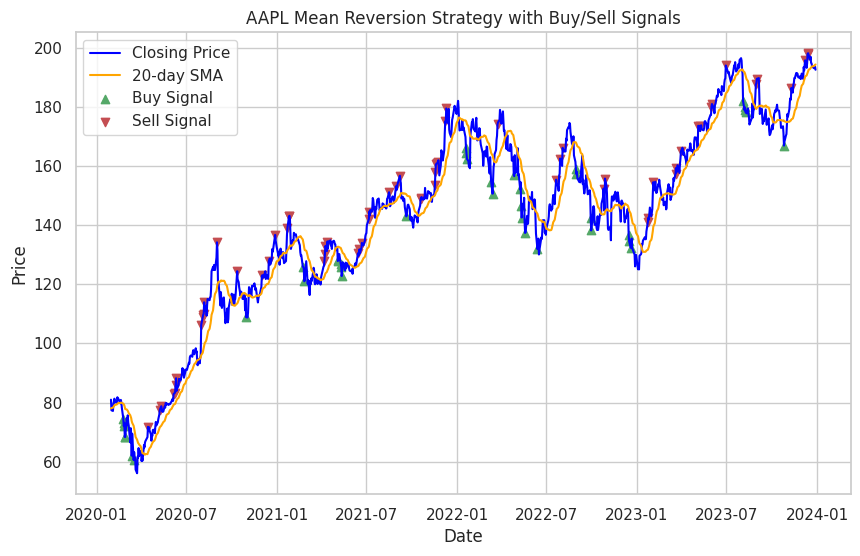

Profit Percentage: 39.11%
Sharpe Ratio: 0.35
PnL Ratio: 1.15
Max Drawdown: -25.89%
PnL Ratio: 1.15


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch stock data
symbol = 'AAPL'  # Example: Apple Inc.
stock_data = yf.download(symbol, start='2020-01-01', end='2024-01-01')

# Initialize an empty DataFrame
data = pd.DataFrame(index=stock_data.index)
data["Open"] = stock_data['Open']
data["Close"] = stock_data['Close']
data["Adj Close"] = stock_data['Adj Close']

# Calculate the 20-day moving average and standard deviation
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['Std_20'] = data['Close'].rolling(window=20).std()

# Calculate the Z-Score (Standardized difference between the closing price and the SMA)
data['Z-Score'] = (data['Close'] - data['SMA_20']) / data['Std_20']

# Drop NaN values caused by the rolling window
data = data.dropna()

# Define buy and sell signals
data['Buy_Signal'] = data['Z-Score'] < -2
data['Sell_Signal'] = data['Z-Score'] > 2

# Initialize Capital and track the position
initial_capital = 1000  # Set your initial capital
capital = initial_capital
data.loc[:, 'Capital'] = initial_capital  # Using .loc to avoid the warning

# Track positions based on Buy/Sell signals
position = 0  # 1 means holding stock, 0 means not holding
capital_values = []  # Store capital values in a list

for i in range(len(data)):
    try:
        if data['Buy_Signal'].iloc[i] and position == 0:  # Buy Signal and no position
            position = capital / data['Close'].iloc[i]  # Buying at current price
        elif data['Sell_Signal'].iloc[i] and position > 0:  # Sell Signal and holding stock
            capital = position * data['Close'].iloc[i]  # Selling at current price
            position = 0  # Clearing the position

        # Calculate portfolio value
        current_capital = position * data['Close'].iloc[i] if position > 0 else capital
        capital_values.append(current_capital)

    except Exception as e:
        print(f"Error at index {i}: {e}")
        capital_values.append(capital_values[-1] if capital_values else initial_capital)
        continue

# Update Capital column all at once
data.loc[:, 'Capital'] = capital_values

# Final portfolio value
final_value = data['Capital'].iloc[-1]

# Profit Percentage Calculation
profit_percentage = (final_value - initial_capital) / initial_capital * 100

# Calculate daily returns
data['Daily_Returns'] = data['Capital'].pct_change()

# Sharpe Ratio Calculation
risk_free_rate = 0.03  # Annual risk-free rate (e.g., 3%)
daily_risk_free_rate = risk_free_rate / 252  # Convert annual rate to daily rate
excess_daily_returns = data['Daily_Returns'] - daily_risk_free_rate
sharpe_ratio = excess_daily_returns.mean() / excess_daily_returns.std() * np.sqrt(252)

# PnL Ratio Calculation
positive_pnl = data[data['Daily_Returns'] > 0]['Daily_Returns'].sum()
negative_pnl = data[data['Daily_Returns'] <= 0]['Daily_Returns'].sum()
pnl_ratio = positive_pnl / abs(negative_pnl) if negative_pnl != 0 else np.nan

# Max Drawdown Calculation
rolling_max = data['Capital'].cummax()
drawdown = (data['Capital'] - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Plotting the results
try:
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Closing Price', color='blue')
    plt.plot(data['SMA_20'], label='20-day SMA', color='orange')

    # Plot Buy and Sell signals
    plt.scatter(data.index[data['Buy_Signal']], data['Close'][data['Buy_Signal']],
                marker='^', color='g', label='Buy Signal', alpha=1)
    plt.scatter(data.index[data['Sell_Signal']], data['Close'][data['Sell_Signal']],
                marker='v', color='r', label='Sell Signal', alpha=1)

    # Title and labels
    plt.title(f'{symbol} Mean Reversion Strategy with Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"Error while plotting: {e}")

# Output profit percentage, Sharpe ratio, PnL ratio, and max drawdown
print(f"Profit Percentage: {profit_percentage:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"PnL Ratio: {pnl_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"PnL Ratio: {pnl_ratio:.2f}")


**Chart Example:**
The plot will show the stock price along with the 20-day moving average. Buy signals will occur when the price is significantly below the moving average (indicating oversold conditions), while sell signals will occur when the price is above the moving average (indicating overbought conditions).

### **Limitations of Mean Reversion Strategy**

While mean reversion can be a valuable strategy, it’s important to consider its limitations:

1. **Market Conditions**: The strategy works best in range-bound markets; in trending markets, prices may not revert.
2. **False Signals**: Short time frames can lead to noise, causing false signals.
3. **Transaction Costs**: Frequent trades can incur high transaction costs.
4. **Economic Shocks**: Unexpected events can cause price deviations that last longer than expected.
5. **Over-reliance on Historical Data**: The assumption that past behavior will continue may not always hold.
6. **Psychological Biases**: Market sentiment can cause prolonged deviations from the mean.

---


### Performance Evaluation and Conclusion

To evaluate the performance of the mean reversion strategy, you can backtest it using historical data. This involves simulating trades based on past price movements and measuring key performance metrics like:

- **Win Rate**: The percentage of profitable trades.
- **Profit/Loss Ratio**: The average profit compared to average loss.
- **Maximum Drawdown**: The largest peak-to-trough loss in the strategy.

By optimizing the parameters such as the time period of the moving average or adjusting the Z-score thresholds, you can improve the strategy’s performance.

---

### Conclusion

Mean reversion is a powerful and popular trading strategy used by many quant traders. By understanding the relationship between a security’s price and its historical mean, traders can identify potential reversals and make profitable trades. The key is to develop a sound strategy, use proper risk management, and continually backtest and refine the approach.

While mean reversion strategies are popular, it’s important to remember that no strategy is foolproof. There will be periods of underperformance, and market conditions can change. Therefore, it’s crucial to monitor and adjust the strategy regularly to ensure its effectiveness.

Happy trading, and may your mean reversion strategy be profitable!

---


**References**
[Investopedia Mean Reversion Link](https://www.investopedia.com/terms/m/meanreversion.asp)


---
---

###**Q3. Feedback: (Marks: 10)**
\
Share your feedback on the video to make it better and point out all the mistakes and
detailed corrections timestamp wise.
[Video Link](https://drive.google.com/file/d/18mRpZelvFpgHOP4pdYyPGEJVC9sBpdrn/view)

### Summary of the Video Lecture: Evaluating the Goodness of Fit in Linear Regression  

The lecture provides a detailed exploration of the concept of **goodness of fit** in linear regression models, focusing on how to evaluate and quantify the quality of a model's predictions. It introduces both graphical and statistical approaches, with an emphasis on **residual plots** and the **R-squared (R²)** metric.  

#### Key Topics Covered  
1. **What is Goodness of Fit?**  
   The lecture explains that goodness of fit measures how well a regression model captures the observed data's patterns and variability.  

2. **Role of R-Squared**  
   The R-squared statistic is introduced as a key tool to quantify fit, calculated as:  
   $$
   R^2 = \frac{\text{Variance explained by the model}}{\text{Total variance}}
   $$
   It is highlighted as a measure of the proportion of total variance in the dependent variable that is explained by the model.  

3. **Interpreting R-Squared Values**  
   - High R-squared values indicate a strong fit between the model and the data.  
   - Low R-squared values may suggest insufficient predictors or issues with the model structure.  

4. **Graphical Tools for Evaluation**  
   Residual plots are discussed as a complementary method to diagnose potential issues, such as non-linearity, heteroscedasticity, or outliers.  

#### Key Takeaways  
- The importance of evaluating model performance through statistical and graphical methods.  
- A clear understanding of R-squared as a measure of fit quality and its practical interpretation.  
- Residual analysis as a valuable tool to identify areas for model improvement.  

The lecture emphasizes that a thorough evaluation of goodness of fit is critical for building effective and reliable regression models.


### Mistakes in the Video Lecture  

1. **Linear Equation Example (time stamp - 00:20 seconds)**  
   The video uses the specific equation $( 2x + 5 )$ as an example of a regression fit. Instead of this, it would have been more appropriate to demonstrate the concept using the **general linear regression equation**:  

   $
   y = \beta_0 + \beta_1x + \epsilon
   $

   Here, $( \beta_0 )$ and $( \beta_1 )$ represent the intercept and slope of the regression line, respectively, and $( \epsilon )$ accounts for random error. Using the general equation would better illustrate the flexibility and applicability of linear regression models to diverse datasets.
---
2. **Lack of Discussion on Linear Regression Assumptions (time stamp - 01.12 seconds)**  
   The video omits an explanation of the **assumptions underlying linear regression**, which are essential for ensuring the validity of the analysis. These include:  
   - **Linearity:** The relationship between independent and dependent variables is linear.  
   - **Independence:** Observations are independent of each other.  
   - **Homoscedasticity:** The variance of residuals is constant across all levels of the independent variable.  
   - **Normality of Residuals:** Residuals are normally distributed.  

   Ignoring these assumptions can lead to misleading results, making their inclusion critical for a comprehensive understanding of regression analysis.

---
3. **Misuse of the Term "Error" Instead of "Residual" (time stamp - 01:12)**

   At this timestamp, the video incorrectly uses the term **error** when it should refer to **residuals**.  

   In statistics and optimization, errors and residuals are distinct:  
   - **Error:** The deviation of an observed value from the true, but unobservable, value of a quantity (e.g., the population mean).  
   - **Residual:** The difference between the observed value and the estimated value of the quantity (e.g., a sample mean).  

   This distinction is critical in regression analysis:  
   - **Regression Errors:** The theoretical deviations from the true regression line.  
   - **Regression Residuals:** The observed deviations from the estimated regression line.  

   Residuals are central to diagnostic tools like residual plots and studentized residuals, which evaluate model performance. Misusing these terms can lead to confusion, especially for those new to the subject.
---
4. **Use of better Residual Plots(time stamp - 02.05)**
    The residual plot in the video does not effectively demonstrate key concepts for evaluating linear regression fit.
  - Ideally, residuals should scatter randomly around zero, indicating a good fit.
  - The plot in the video shows a nonlinear arrangement, misleadingly suggesting a poor fit for a linear model.
  
- The video fails to present multiple graphs to explain various residual patterns and their implications for model evaluation:
  - **Ideal residual plot:** Random distribution of residuals, indicating a good linear fit.
  - **Residual plot with trend:** Shows a curve, indicating a need for a more complex model (e.g., polynomial regression).
  - **Residual plot with heteroscedasticity:** Spread of residuals varies across predicted values, signaling model assumptions are violated.
  - **Residual plot with autocorrelation:** Residuals show dependence over time, especially relevant for time series data.

By including these graphs, the video would provide a clearer understanding of how to assess regression fit and diagnose potential issues with the model.

---
---

### **Q4. Trading Strategy Optimization: (Marks: 10)**
1. Login to https://blueshift.quantinsti.com/home
2. Pick up “Long Only Momentum” strategy from the dashboard
3. Tweak the strategy to improve the performance and specify all the changes you
made. And share the improved strategy performance.
4. Mention 5 issues you faced while working on blueshift.




**Default Long Only Momentum Blueshift Momentum Strategy:**



``` python
"""
    Title: Long-only momentum portfolio rebalancer
    Description: This strategy uses past returns to rank securities
                and go long the top (bottom) n assets.
    Style tags: Momentum
    Asset class: Equities, ETFs
    Dataset: NSE
    Risk: Medium
    Minimum Capital: 10,000
"""
import datetime

from blueshift.library.pipelines import (
        period_returns, filter_universe)
from blueshift.pipeline.factors import AverageDollarVolume

from blueshift.protocol import AlgoMode
from blueshift.pipeline import Pipeline
from blueshift.errors import NoFurtherDataError, ValidationError
from blueshift.api import(
                            symbol,
                            order_target_value,
                            schedule_once,
                            schedule_function,
                            date_rules,
                            time_rules,
                            attach_pipeline,
                            pipeline_output,
                            get_datetime,
                            set_long_only,
                            set_algo_parameters,
                            terminate
                       )

def next_month(dt):
    if dt.month == 12:
        new = datetime.datetime(year=dt.year+1,month=1, day=1)
    else:
        new = datetime.datetime(year=dt.year,month=dt.month+1, day=1)
        
    return new.strftime('%B'), new.year
        

def initialize(context):
    context.strategy_name = 'Long-only momentum portfolio rebalancer'
    context.weights = {}
    
    # The context variables can be accessed by other methods
    context.params = {'lookback':60,       # lookback for momentum
                      'num_stocks':10,      # max assets to trade
                      'universe':100,      # filtering on liquidity
                      #'universe':['ACC','RELIANCE','TCS'],  # filtering on liquidity
                      'order_value': 10000 # order size for each position
                      }
    
    context.params['lookback'] = int(context.params['lookback'])
        
    # set long only
    set_long_only()
    
    # Call rebalance function on the first trading day of each month
    # in case of a backtest. For live run, schedule once
    if context.mode == AlgoMode.BACKTEST:
        schedule_function(strategy, date_rules.month_start(),
                time_rules.market_open(minutes=45))
    else:
        schedule_once(strategy)

    # Set up the pipe-lines for the universe
    attach_pipeline(make_strategy_pipeline(context),
            name='strategy_pipeline')
    
    msg = f'Starting strategy {context.strategy_name} '
    msg += f'with parameters {context.params}'
    print(msg)

def make_strategy_pipeline(context):
    pipe = Pipeline()

    lookback = context.params['lookback']
    offset = max(0, min(20, int(context.params['lookback']/4)))

    top_n = context.params['universe']
    screener = AverageDollarVolume(
            window_length=lookback).top(top_n)
    
    
    # compute past returns
    momentum = period_returns(lookback, offset=offset)
    pipe.add(momentum,'momentum')
    pipe.set_screen(screener)
    return pipe

def strategy(context, data):
    generate_signals(context, data)
    rebalance(context,data)

def generate_signals(context, data):
    try:
        pipeline_results = pipeline_output('strategy_pipeline')
    except NoFurtherDataError:
        context.weights = {}
        return
    
    n = context.params['num_stocks']
    candidates = pipeline_results.dropna().sort_values('momentum', ascending = False )
    size = len(candidates)

    if size == 0:
        if context.mode != AlgoMode.BACKTEST:
            print(f'{get_datetime()}: no stocks passed filterting criteria.')
        context.weights = {}
        
    candidates = candidates[:n]
    candidates['weights'] = context.params['order_value']
    context.weights = candidates.weights.to_dict()
    print(candidates)

def rebalance(context,data):
    n = len(context.weights)
    if n < 1:
        return

    # square off old positions if any
    for security in context.portfolio.positions:
        if security not in context.weights:
               order_target_value(security, 0)

    # Place orders for the new portfolio
    for security in context.weights:
        order_target_value(security, context.weights[security])
        
    # reset current universe for dynamic selection
    context.weights = {}
    
    if context.mode != AlgoMode.BACKTEST:
        month, year = next_month(get_datetime())
        msg = 'Rebalancing orders sent. This strategy is designed for '
        msg += 'monthly rebalancing, next rebalance date is first '
        msg += f'business day of {month}, {year}'
        print(msg)
        terminate()
```



### **My resvised long only momemtum stratergy**


``` python
from blueshift.library.technicals.indicators import rsi, ema
from blueshift.pipeline.factors import AverageDollarVolume
from blueshift.pipeline import Pipeline
from blueshift.library.pipelines import period_returns
from blueshift.api import (
    symbol, order_target_value, schedule_function, date_rules, time_rules,
    attach_pipeline, pipeline_output, set_long_only
)
import numpy as np
from blueshift.protocol import AlgoMode


def initialize(context):
    context.strategy_name = "Optimized Long-Only Momentum Portfolio"
    context.params = {
        'lookback': 252,           # Lookback for momentum
        'num_stocks': 10,          # Max assets to trade
        'universe': 100,           # Top liquid stocks
        'short_ema': 20,           # Short EMA period
        'long_ema': 50,            # Long EMA period
        'rsi_period': 14,          # RSI period
        'rsi_lower': 40,           # RSI lower threshold
        'rsi_upper': 70,           # RSI upper threshold
        'volatility_lookback': 30, # Lookback for volatility
        'momentum_weight': 0.3,    # Weight for momentum
        'trend_weight': 0.7,       # Weight for EMA trend
    }
    set_long_only()
    context.weights = {}
    schedule_function(strategy, date_rules.month_start(), time_rules.market_open(minutes=45))
    attach_pipeline(make_strategy_pipeline(context), 'strategy_pipeline')


def make_strategy_pipeline(context):
    pipe = Pipeline()
    lookback = context.params['lookback']
    top_n = context.params['universe']

    # Liquidity screen
    liquidity_screen = AverageDollarVolume(window_length=lookback).top(top_n)
    momentum = period_returns(lookback)
    pipe.add(momentum, 'momentum')
    pipe.set_screen(liquidity_screen)

    return pipe


def strategy(context, data):
    generate_signals(context, data)
    rebalance(context, data)


def generate_signals(context, data):
    try:
        pipeline_results = pipeline_output('strategy_pipeline')
    except:
        context.weights = {}
        return

    candidates = pipeline_results.dropna().sort_values('momentum', ascending=False).head(context.params['num_stocks'])

    weights = {}
    scores = {}

    for security in candidates.index:
        # Fetch historical data for indicators
        px = data.history(security, 'close', max(context.params['long_ema'], context.params['rsi_period'], context.params['volatility_lookback']), '1d')
        
        if len(px) < max(context.params['long_ema'], context.params['rsi_period']):
            continue

        short_ema = ema(px.values, context.params['short_ema'])
        long_ema = ema(px.values, context.params['long_ema'])
        rsi_val = rsi(px.values, context.params['rsi_period'])
        volatility = np.std(px.values[-context.params['volatility_lookback']:])
        
        # Check RSI and EMA spread conditions
        if short_ema > long_ema and context.params['rsi_lower'] <= rsi_val <= context.params['rsi_upper']:
            momentum_score = candidates.loc[security, 'momentum']
            trend_score = short_ema - long_ema
            
            # Composite score
            score = (context.params['momentum_weight'] * momentum_score +
                     context.params['trend_weight'] * trend_score)
            
            # Adjust position size inversely with volatility
            position_size = 1 / volatility if volatility > 0 else 1
            scores[security] = score
            weights[security] = score * position_size

    # Normalize weights
    total_score = sum(weights.values())
    if total_score > 0:
        for security in weights:
            weights[security] = weights[security] / total_score
    
    context.weights = weights
    context.scores = scores  # For debugging and analysis


def rebalance(context, data):
    # Clear positions not in the current portfolio
    for security in context.portfolio.positions:
        if security not in context.weights:
            order_target_value(security, 0)
    
    # Place orders for current weights
    for security, weight in context.weights.items():
        portfolio_value = context.portfolio.cash + context.portfolio.portfolio_value
        order_target_value(security, weight * portfolio_value)

```



### Summary of Points and Methods in the Optimized Long-Only Momentum Portfolio Strategy:

1. **Liquidity Screening**:  
   - Focuses on the top `n` most liquid stocks based on average dollar volume to ensure tradability and minimize slippage.

2. **Momentum Factor**:  
   - Uses a momentum score computed from historical returns over a specified lookback period to identify strong-performing assets.

3. **Trend-Following with EMAs**:  
   - Incorporates exponential moving averages (short-term and long-term) to gauge market trends. Long positions are favored when the short EMA is above the long EMA.

4. **RSI Filter**:  
   - Adds a Relative Strength Index (RSI) condition to filter stocks, allowing trades only within a defined RSI range (e.g., between 40 and 70) to avoid overbought or oversold situations.

5. **Volatility Adjustment**:  
   - Adjusts position sizes inversely proportional to recent volatility, aiming to manage risk dynamically by reducing exposure to highly volatile stocks.

6. **Composite Scoring**:  
   - Combines momentum and trend-following scores using a weighted sum, assigning higher importance to trends (70%) compared to momentum (30%).

7. **Portfolio Diversification**:  
   - Limits the portfolio to a fixed number of stocks (`num_stocks`) to avoid over-concentration and improve diversification.

8. **Dynamic Weight Normalization**:  
   - Normalizes portfolio weights based on composite scores to ensure the portfolio is fully invested and risk-adjusted.

9. **Rebalancing**:  
   - Clears positions for stocks no longer in the portfolio and reallocates funds to stocks meeting current conditions, ensuring adherence to strategy signals.

---

### Improvements Over a Basic Long-Only Momentum Strategy:

1. **Multi-Factor Approach**:
   - Incorporates momentum, trend-following (EMA spread), RSI, and volatility to create a more comprehensive signal compared to a single momentum factor.

2. **Risk Management**:
   - Volatility-based position sizing reduces the impact of highly volatile assets, improving portfolio stability.

3. **Selective Entries**:
   - RSI filtering ensures positions are taken in stocks with balanced market conditions, reducing exposure to extremes.

4. **Trend Confirmation**:
   - Using short and long EMAs ensures that momentum signals align with broader market trends, reducing false positives.

5. **Liquidity Focus**:
   - Prioritizes highly liquid stocks, which are easier to trade with minimal impact costs.

6. **Weighted Scoring**:
   - Allows customization of the relative importance of different factors (e.g., momentum vs. trend-following) to match specific market conditions or investor preferences.

7. **Dynamic Rebalancing**:
   - Ensures timely adaptation to market changes by re-evaluating signals monthly, helping maintain alignment with strategy goals.

---

### Potential Enhancements:

- **Sector Balancing**: Introduce sector caps to prevent overexposure to specific industries.
- **Drawdown Management**: Add stop-loss or trailing stop rules to mitigate downside risk.
- **Optimization Techniques**: Use backtesting and machine learning to fine-tune factor weights (e.g., momentum vs. trend).
- **Sharpe Ratio Consideration**: Evaluate risk-adjusted returns during scoring to enhance portfolio performance.

This strategy strikes a balance between simplicity and robustness, integrating technical, momentum, and volatility measures for improved decision-making.


The **Optimized Long-Only Momentum Portfolio Strategy** offers significant enhancements over a basic long-only momentum strategy by integrating multiple factors such as trend-following (EMA spreads), RSI filters, and volatility-based position sizing, in addition to pure momentum. These improvements help in managing risk, aligning with broader market trends, and increasing the robustness of the portfolio.

For a clearer comparison, I have attached the **tear sheets for both strategies** (basic momentum and optimized momentum) over **three different time periods**. These tear sheets provide detailed performance metrics, including returns, Sharpe ratio, drawdowns, and other relevant statistics, allowing for a side-by-side evaluation of their effectiveness across varying market conditions.

[Tear Sheets](https://drive.google.com/drive/folders/1pHlrx7SYVX-btsSq8NqooeT4pXwydzcV?usp=sharing)

### 5 Key Issues I Faced While Working on Blueshift  

1. **Backtesting Interruptions on Tab/Window Change**  
   Switching between tabs or windows during a backtest often caused interruptions or delays. This was frustrating, especially for complex strategies with longer execution times, as it required constant attention to the active window to ensure smooth execution.

2. **Lack of Immediate Error Feedback**  
   Errors in the code were only identified after saving and running the strategy. This two-step process made debugging inefficient, as I had to repeatedly run the strategy just to identify syntax or runtime errors. An additional "Save and Run" button could significantly streamline this process, allowing for both saving and immediate execution, thereby improving efficiency for testing and debugging.

3. **Inability to Rename Backtests**  
   Once a backtest was run, its name was fixed and couldn’t be changed. This made organizing and reviewing multiple strategies difficult, especially when analyzing historical performance across different iterations or scenarios.

4. **Limited Visibility of Available Functions**  
   Many useful functions, such as `ema` and `rsi`, were not well-documented within the platform. While they were available, discovering and utilizing them often required external references like the GitHub repository, which could be inconvenient for new users or those unfamiliar with external resources.
   The below Github link was useful while writing the strategy [Blueshift Quant Insti](https://github.com/QuantInsti/blueshift-demo-strategies/tree/master)
5. **Performance Graph Ambiguity**  
   The performance graphs for strategies lacked proper labeling, particularly for axes and legends. This made it difficult to interpret returns and benchmarks accurately, especially for new users unfamiliar with Blueshift’s visualization style. While it is possible to snapshot the performance graph, there is no option to snapshot or download the performance metrics (such as Sharpe ratio and alpha) directly from the dashboard. This limitation hinders seamless documentation and analysis of backtest results.

By addressing these points, Blueshift can enhance its user experience and provide developers with a smoother and more efficient workflow.





---
---

###**Q5. Personal Motivation: (Marks: 5)**
\
Why do you want to join this role, and what is your understanding of the roles and
responsibilities involved?


---

I am deeply passionate about finance and the ways in which mathematics and statistics can be used to make informed and profitable decisions in the markets. This aligns perfectly with the core responsibilities of the role at QuantInsti, where I would have the opportunity to apply my analytical skills in developing and backtesting quantitative trading strategies.

I am particularly drawn to this role for several reasons:

- **Passion for Finance & Quantitative Trading**: The chance to work on quantitative strategies involving machine learning, econometrics, and statistics excites me. I have always been intrigued by the power of data-driven decision-making in trading, and this role would allow me to turn that interest into practical applications.
  
- **Competitive and Dynamic Environment**: I thrive in competitive, high-pressure environments, and I am eager to contribute to a company like QuantInsti, which is at the forefront of financial education and technology. This role offers a fast-paced, intellectually stimulating environment, which would allow me to continuously learn, grow, and refine my skills.

- **Technical Skills & Learning**: I have experience in Python and am eager to enhance my knowledge in machine learning and algorithmic trading. The opportunity to develop content for online courses and backtest strategies excites me as it aligns with my goal to deepen my expertise and contribute to the development of new learning material for others in the industry.

- **Creative Problem-Solving**: I enjoy thinking analytically and creatively to solve complex problems. The role’s focus on content creation and enhancing educational delivery is particularly appealing, as I would not only get to apply my technical skills but also contribute to shaping the way others learn about and engage with quantitative trading.

I believe this role would be an excellent step toward building my career in quantitative finance, and I’m excited about the potential to contribute to and grow with QuantInsti.

---

My understanding of the roles and responsibilities involved in this position at QuantInsti is as follows:

1. **Research on Quantitative Trading Strategies**:  
   The role requires conducting research on various quantitative trading strategies, including those based on machine learning, natural language processing (NLP), statistics, and econometrics. This involves analyzing market data, identifying patterns, and developing strategies that can be applied to real-world trading environments.

2. **Content Development for Online Courses**:  
   A key responsibility is creating high-quality content for self-paced online courses related to algorithmic and quantitative trading. This involves designing learning materials that are both technically sound and easy to understand for students across a wide range of experience levels.

3. **End-to-End Course Creation**:  
   From ideation to execution, the role involves being actively engaged in the complete lifecycle of course creation. This includes planning the course structure, developing the content, testing it with real-world examples, and ensuring that it aligns with the educational goals of QuantInsti.

4. **Backtesting Quantitative Strategies and Models**:  
   Another important aspect of the role is designing, developing, and backtesting trading strategies and models. This involves using data to test strategies, refine them, and evaluate their potential for real-world application in algorithmic trading.

5. **Enhancing Existing Content and Pedagogy**:  
   The role also includes continuously improving existing course materials and delivery methods to ensure they remain up-to-date with the latest industry trends and best practices. This may involve adjusting the teaching approach and integrating new technologies or methods into the content.

6. **Technical Blogging**:  
   Writing technical blogs is a key responsibility, aimed at engaging with the broader quantitative trading community. These blogs would cover important concepts, insights, and trends within algorithmic and quantitative trading, helping to establish QuantInsti as a thought leader in the space.

7. **Collaboration and Communication**:  
   As the role involves working across various teams, effective communication and collaboration are essential. You’ll be working closely with subject matter experts, content creators, and technical teams to ensure the final product is coherent, relevant, and of the highest quality.

In summary, the role combines research, content creation, technical development, and community engagement to enhance the learning experience in quantitative trading. It offers the opportunity to contribute significantly to the growth of both QuantInsti's educational offerings and the broader field of algorithmic trading.